In [1]:
# -*- coding: utf-8 -*-
"""
play around
"""
import getpass
import os
import pickle as cp
import sys
import time
import itertools as it
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
from random import uniform
from matplotlib import rcParams 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import colors
from matplotlib import gridspec

In [4]:
## X4_Ldistphi01_bara_eps01_q X4_Ldistphi01_bara_eps01_q
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

def phase_plot(loc_2,times):
    loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/%s/'%loc_2
    name= 'parameter_scan_all_si'
    x = np.load(loc+name)
    x = x.replace([np.inf, -np.inf], np.nan)
    #df = pd.DataFrame(x.as_matrix())
    xm = x.as_matrix()
    xm.shape
    df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
                   axis= 1, keys = times)
    heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                                times,200*100), # tauspace, nsamples * nagents
                                                df.values.T.ravel(), 
                                                bins=[times,100])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    rcParams.update({'font.size': 18})
    plt.clf()
    #plt.imshow(heatmap.T)
    fig,ax = plt.subplots(2,1,sharex=True)
    fig.set_size_inches((10.5,10.5))
    gs = gridspec.GridSpec(2, 2, height_ratios=[10./10.5,1/10.5],width_ratios=[10./10.5,.5/10], wspace=0.1)
    ax=plt.subplot(gs[0,0])

    data = heatmap.T
    #norm_data = (data - 0) / np.max(data, axis=0)[np.newaxis,:]
    # im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis', norm=colors.LogNorm(vmin=heatmap.min()+1, 
    #                                                                                      vmax=heatmap.max()))
    #im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis')
    norm_data = (data -0) / np.sum(data, axis=0)[ np.newaxis,:]
    im2 = ax.pcolormesh(xedges,yedges , (norm_data)+0.001,  cmap='viridis',norm=colors.LogNorm(vmin=1./100,
                                                                                        vmax=0.2))
    df_inc = pd.concat([ pd.concat([xm[j][i]['i'] for i in range(200)]) for j in range(100)], 
                   axis= 1, keys = times)

    ax3=plt.subplot(gs[0,1])
    cb = plt.colorbar(im2,cax=ax3)
    cb.set_label(r'normalized by $\tau$')
    ax.set_ylabel(r'Frequency $s_i$')
    #ax.set_xlabel(r'$\tau$')
    #ax.set_ylim((0,1))
    #ax.set_aspect('equal')
    ax.set_xscale('log')


    loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/%s/'%loc_2
    name= 'parameter_scannat_sav'
    x = np.load(loc+name)
    x = x.replace([np.inf, -np.inf], np.nan)
    #df = pd.DataFrame(x.as_matrix())
    xm = x.as_matrix()

    # ks= (df_cap*df).values.reshape(100,200,100)
    # y = ks.sum(1) / df_cap.values.reshape(100,200,100).sum(1)
    #plt.imshow(heatmap.T)
    ax2 = plt.subplot(gs[1,0])
    ax3 = ax2.twinx()
    #fig.set_size_inches((12,10))

    ax2.plot(times,xm.mean(1) ,'k')
    ax2.fill_between(times,xm.mean(1)-xm.std(1),xm.mean(1)+xm.std(1),
                     color='b',alpha=0.4)
    gg=[[gini(df_inc[tau][i:(i+1)*100]) for i in range(200)] for tau in times]
    ax3.plot(times, np.array(gg).mean(1),'k')
    ax3.fill_between(times,np.array(gg).mean(1)-np.array(gg).std(1),np.array(gg).mean(1)+np.array(gg).std(1),
                     color='g',alpha=0.4)

    ax3.set_ylabel(r'Gini')
    ax2.tick_params(axis='y', colors='b')
    ax3.tick_params(axis='y', colors='g')
    ax2.set_ylabel(r'$\tilde{s}$')
    ax2.set_xlabel(r'$\tau$')
    ax2.set_xscale('log')
    ax3.set_ylim((0,0.5))
    #ax2.set_ylim(ymin=0.,ymax = 1.)
    fig.savefig('%s.pdf'%loc_2)

In [6]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X4_Ldistphi01_bara_eps01_q_longer/'
name= 'parameter_scannat_sav'
x = np.load(loc+name)
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()

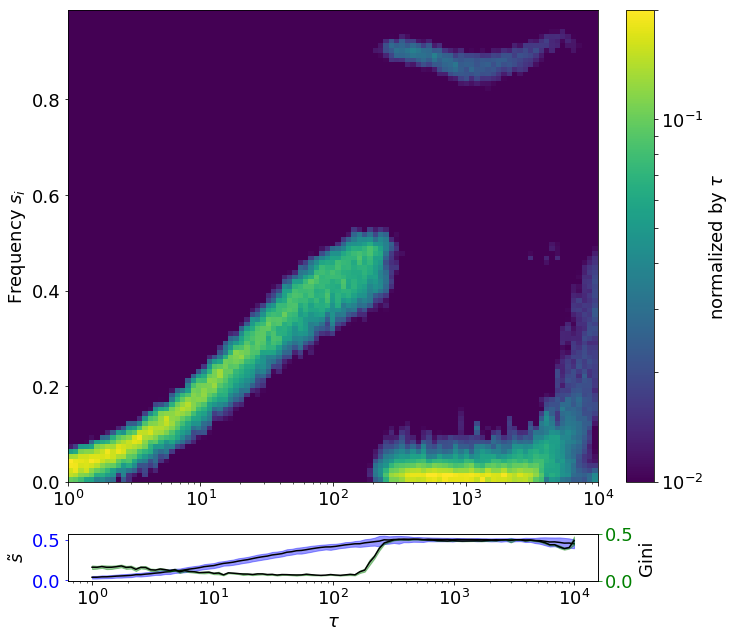

In [8]:
 # X4_Ldistphi01_bara_eps01_q X4_Ldistphi01_bara_eps01_q_longer  

locs = ['X3_Ldistphi01_fully_eps01_q_longer']
times = [np.logspace(0,4,100)] #[np.logspace(0,3,100),
for i, loc in enumerate(locs):
    phase_plot(loc, times[i])